<a href="https://colab.research.google.com/github/RobertGrados/QuantumGravity/blob/master/Stock_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
!pip install yfinance streamlit pandas scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [19]:
import streamlit as st
import yfinance as yf
import matplotlib.pyplot as plt
import time

In [20]:
# Download historical price data from Yahoo Finance
ticker = "GOOG"  # Apple stock symbol
start_date = "2010-01-01"
end_date = "2024-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
# Display the first few rows of the dataset
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.610239   78541293
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.541497  120638494
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.149715  159744526
2010-01-07  15.178109  15.193053  14.760922  14.797037  14.797037  257533695
2010-01-08  14.744733  15.024933  14.672753  14.994298  14.994298  189680313


In [21]:
pd.DataFrame(data).head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
2010-01-11,15.055070,15.055070,14.795543,14.971633,14.971633,289597429
2010-01-12,14.885456,14.898158,14.645107,14.706875,14.706875,194859654
2010-01-13,14.358431,14.654571,14.293923,14.622441,14.622441,260838034
2010-01-14,14.542989,14.799528,14.515841,14.691184,14.691184,170239717


In [22]:
import yfinance as yf

# Download historical price data from Yahoo Finance
ticker = "AAPL"  # Apple stock symbol
start_date = "2010-01-01"
end_date = "2024-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
# Display the first few rows of the dataset
print(data.head())

# Select closing prices
prices = data['Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461976  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473147  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370185  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400680  447610800


In [23]:
data_pd = pd.DataFrame(data)
data_pd.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.344218,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.272051,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.360522,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.323683,432894000


Step 2: Preprocess Data

Next, we’ll preprocess the data to create features for our machine learning model. We’ll calculate technical indicators like moving averages, which are commonly used in financial analysis.

In [24]:
# Calculate moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean() # calculate the 10-day MA
data['MA_50'] = data['Close'].rolling(window=50).mean() # calculate the 50-day MA
# Drop NaN values
data = data.dropna() # Removes rows with missing values that result from MA computation above
# Define features and target
X = data[['Close', 'MA_10', 'MA_50']] # defines the feature set
y = data['Close'].shift(-1).dropna()  # Defines the target variable - closing price shifted by one day (to predict the next day'sprice)
X = X[:-1]
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
pd.DataFrame(X).head(10)

,Close,MA_10,MA_50
Date,,,
2010-03-16,8.016071,7.879714,7.391336
2010-03-17,8.004286,7.932536,7.398557
2010-03-18,8.023214,7.982321,7.405893
2010-03-19,7.937500,7.994107,7.413950
2010-03-22,8.026786,8.014357,7.424071
2010-03-23,8.155714,8.033429,7.435771
2010-03-24,8.191786,8.049607,7.449529
2010-03-25,8.094643,8.053714,7.463050
2010-03-26,8.246429,8.069072,7.477514


Step 4: Train a Predictive Model

We’ll use a linear regression model to predict future stock prices based on the features we’ve engineered.

In [8]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.4065230471379797
R² Score: 0.9990488527744555


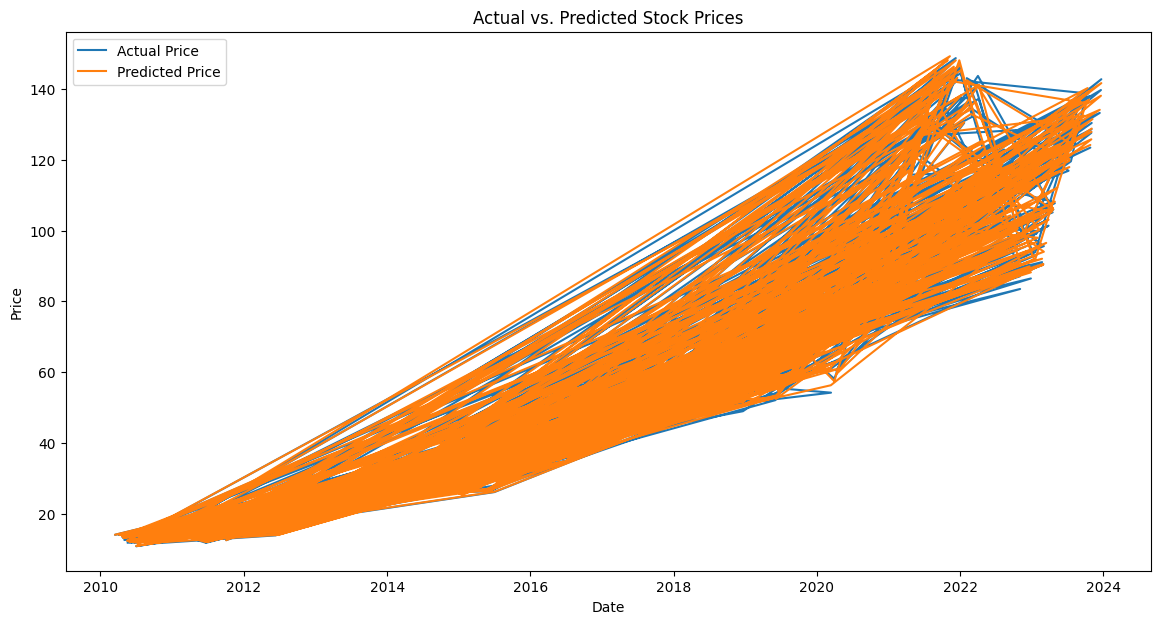

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [10]:
initial_balance = 10000  # Starting balance in USD
balance = initial_balance
position = 0  # Number of shares

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close']
    predicted_price = predictions[i]

    if predicted_price > current_price and balance >= current_price:
        # Buy stock
        shares_to_buy = int(balance // current_price)  # Buy whole shares only
        if shares_to_buy > 0:  # Ensure we are buying at least one share
            position += shares_to_buy
            balance -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        # Sell stock
        balance += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

# Calculate final balance including the value of the remaining shares
final_balance = balance + (position * X_test.iloc[-1]['Close'])
profit = final_balance - initial_balance
print(f"Final balance: ${final_balance:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 458 shares at 21.79
Buying 1 shares at 14.65
Selling 459 shares at 66.74
Buying 485 shares at 63.13
Selling 485 shares at 67.18
Buying 367 shares at 88.73
Selling 367 shares at 55.11
Buying 202 shares at 100.00
Buying 1 shares at 37.92
Selling 203 shares at 27.69
Buying 45 shares at 123.25
Buying 2 shares at 37.50
Buying 1 shares at 21.71
Selling 48 shares at 131.85
Buying 464 shares at 13.63
Selling 464 shares at 62.65
Buying 1901 shares at 15.30
Selling 1901 shares at 27.56
Buying 1803 shares at 29.05
Buying 1 shares at 12.22
Selling 1804 shares at 94.02
Buying 14333 shares at 11.83
Selling 14333 shares at 13.13
Buying 2178 shares at 86.41
Buying 2 shares at 13.36
Selling 2180 shares at 78.65
Buying 1276 shares at 134.31
Buying 6 shares at 14.74
Selling 1282 shares at 149.25
Buying 6509 shares at 29.39
Buying 1 shares at 17.14
Selling 6510 shares at 15.33
Buying 1273 shares at 78.36
Selling 1273 shares at 39.11
Buying 2260 shares at 22.05
Selling 2260 shares at 41.61
Buying 43

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

3. Building the LSTM Model: An LSTM model is constructed with an architecture suitable for the problem, including one or more LSTM layers and a dense output layer.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

NameError: name 'X_train' is not defined

In [ ]:
# Define the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Get the data of the stock
apple_stock = yf.Ticker(ticker_symbol)

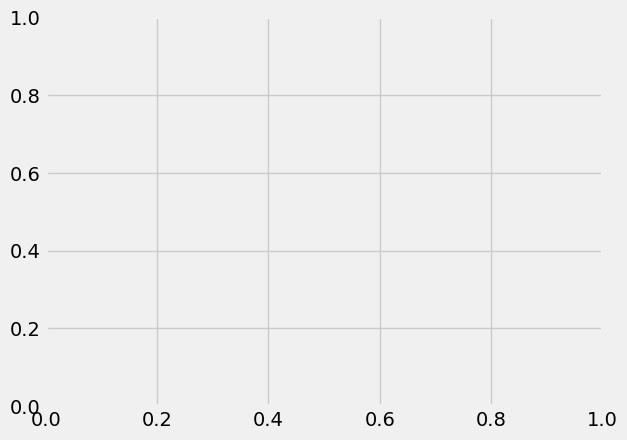

In [ ]:
# Create a matplotlib figure
fig, ax = plt.subplots()

# Use st.pyplot to display the plot
plot = st.pyplot(fig)

In [ ]:
# Loop to fetch and update stock values
while True:
    # Get the historical prices for Apple stock
    historical_prices = apple_stock.history(period='1d', interval='1m')

    # Get the latest price and time
    latest_price = historical_prices['Close'].iloc[-1]
    latest_time = historical_prices.index[-1].strftime('%H:%M:%S')

    # Clear the plot and plot the new data
    ax.clear()
    ax.plot(historical_prices.index, historical_prices['Close'], label='Stock Value')
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock Value')
    ax.set_title('Apple Stock Value')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)

    # Update the plot in the Streamlit app
    plot.pyplot(fig)

    # Show the latest stock value in the app
    st.write(f"Latest Price ({latest_time}): {latest_price}")

    # Sleep for 1 minute before fetching new data
    time.sleep(60)

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-07')

#Show the data
df
#Get the number of rows and columns in the data set
df.shape

#Visualize the closing price history
#We create a plot with name 'Close Price History'
plt.figure(figsize=(16,8))
plt.title('Close Price History')
#We give the plot the data (the closing price of our stock)
plt.plot(df['Close'])
#We label the axis
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#We show the plot
plt.show()

2024-06-24 19:36:20.629301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 19:36:20.629466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 19:36:20.807178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'NoneType' object has no attribute 'group'